In [2]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import glob

df = {}
col_names = []
channels = ['ch', 'lh', 'll', 'rh', 'rl']
for c in channels:
    col_names.append('STD_X_' + c)
    col_names.append('STD_Y_' + c)
    col_names.append('STD_Z_' + c)
    col_names.append('STD_XYZ_' + c)
    col_names.append('STD_SPECTRUM_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_X_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_Y_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_Z_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_XYZ_' + c)
target = [0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
j = 0

for file in sorted(glob.glob('/kaggle/input/parkinson/parkinson/**/*.csv', recursive=True)):
    if not ('Annot' in str(file) or '007' in str(file) or '014' in str(file) or '060' in str(file) or '062' in str(file) or '063' in str(file)):
        if target[j//5] == 0:
            s = 'Здоровый'
        else:
            s = 'Больной'
        j = j+1
        ID = file.split("ID",1)[1][:3]
        CH = file.split("ID",1)[0][-3:-1]
        data = pd.read_csv(file)
        x_data = data['Accel X (g)']
        y_data = data['Accel Y (g)']
        z_data = data['Accel Z (g)']
        xyz_data = []
        for i in range(len(x_data)):
            elem = (x_data[i]**2 + y_data[i]**2 + z_data[i]**2)**0.5
            xyz_data.append(elem)
        fs = 100
        fft_result = np.fft.fft(xyz_data)
        freq = np.fft.fftfreq(len(xyz_data), 1/fs)
        peaks_X, heights_X = find_peaks(x_data, height = np.sum(x_data)/len(x_data))
        peaks_Y, heights_Y = find_peaks(y_data, height = np.sum(y_data)/len(y_data))
        peaks_Z, heights_Z = find_peaks(z_data, height = np.sum(z_data)/len(z_data))
        peaks_XYZ, heights_XYZ = find_peaks(xyz_data, height = np.sum(xyz_data)/len(xyz_data))
        a = []
        b = []
        c = []
        d = []
        for i in range(len(peaks_X[:50])-1):
            a.append(peaks_X[i+1]-peaks_X[i])
        for i in range(len(peaks_Y[:50])-1):
            b.append(peaks_Y[i+1]-peaks_Y[i])
        for i in range(len(peaks_Z[:50])-1):
            c.append(peaks_Z[i+1]-peaks_Z[i])
        for i in range(len(peaks_XYZ[:50])-1):
            d.append(peaks_XYZ[i+1]-peaks_XYZ[i])
        STD_X = np.std((list(data['Accel X (g)'])))
        STD_Y = np.std((list(data['Accel Y (g)'])))
        STD_Z = np.std((list(data['Accel Z (g)'])))
        STD_XYZ = np.std(xyz_data)
        STD_SPECTRUM = np.std(np.abs(fft_result))
        MEAN_PEAKS_INTERVALS_X = np.sum(a)/len(a)
        MEAN_PEAKS_INTERVALS_Y = np.sum(b)/len(b)
        MEAN_PEAKS_INTERVALS_Z = np.sum(c)/len(c)
        MEAN_PEAKS_INTERVALS_XYZ = np.sum(d)/len(d)
        if df.get(ID, False) is False:
            df[ID] = [STD_X, STD_Y, STD_Z, STD_XYZ, STD_SPECTRUM, MEAN_PEAKS_INTERVALS_X, MEAN_PEAKS_INTERVALS_Y, MEAN_PEAKS_INTERVALS_Z, MEAN_PEAKS_INTERVALS_XYZ]
        else:
            df[ID].append(STD_X)
            df[ID].append(STD_Y)
            df[ID].append(STD_Z)
            df[ID].append(STD_XYZ)
            df[ID].append(STD_SPECTRUM)
            df[ID].append(MEAN_PEAKS_INTERVALS_X)
            df[ID].append(MEAN_PEAKS_INTERVALS_Y)
            df[ID].append(MEAN_PEAKS_INTERVALS_Z)
            df[ID].append(MEAN_PEAKS_INTERVALS_XYZ)
df = pd.DataFrame(df).transpose()
df.columns = col_names
df.to_csv('/kaggle/working/dataset2.csv')

In [3]:
df_target = pd.DataFrame(target, columns=['Class'])  

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.25, random_state=0)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42)
cross_val_score(model, X_train, y_train, cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.2 , 1.  , 0.5 , 0.5 , 0.75])

In [6]:
# print(X_train, y_train)

In [7]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=5)
# i = 1
# for train_index, test_index in skf.split(X_train, y_train):
#     print('Итерация %d' %i)
#     # print("TRAIN:", train_index, "TEST:", test_index)
#     # print(X_train.iloc[train_index], X_train.iloc[test_index])
#     # print(y_train.iloc[train_index], y_train.iloc[test_index])
#     # print(type(X_train))
#     # print(type(train_index), test_index)
#     model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
#     y_pred = model.predict(X_train.iloc[test_index])
#     print('\nМетрики по кроссвалидированной выборке')
#     print(f"Accuracy: {accuracy_score(y_train.iloc[test_index], y_pred):.2f}")
#     print(f"Balanced accuracy: {balanced_accuracy_score(y_train.iloc[test_index], y_pred):.2f}")
#     print(f"Precision: {precision_score(y_train.iloc[test_index], y_pred):.2f}")
#     print(f"Recall: {recall_score(y_train.iloc[test_index], y_pred):.2f}")
#     print(f"F1: {f1_score(y_train.iloc[test_index], y_pred):.2f}")
#     print(f"ROC AUC score: {roc_auc_score(y_train.iloc[test_index], y_pred):.2f}")
#     y_pred = model.predict(X_test)
#     print('\nМетрики по тестовой выборке')
#     print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
#     print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.2f}")
#     print(f"Precision: {precision_score(y_test, y_pred):.2f}")
#     print(f"Recall: {recall_score(y_test, y_pred):.2f}")
#     print(f"F1: {f1_score(y_test, y_pred):.2f}")
#     print(f"ROC AUC score: {roc_auc_score(y_test, y_pred):.2f}")
#     print('\n\n')
#     i = i+1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=0)

Random Forest Metrics
CV1: 0.59 accuracy with a standard deviation of 0.27


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


CV2: 0.80 accuracy with a standard deviation of 0.24
Accuracy: 0.88
Balanced accuracy: 0.90
Precision: 0.75
Recall: 1.00
F1: 0.86
ROC AUC score: 0.90


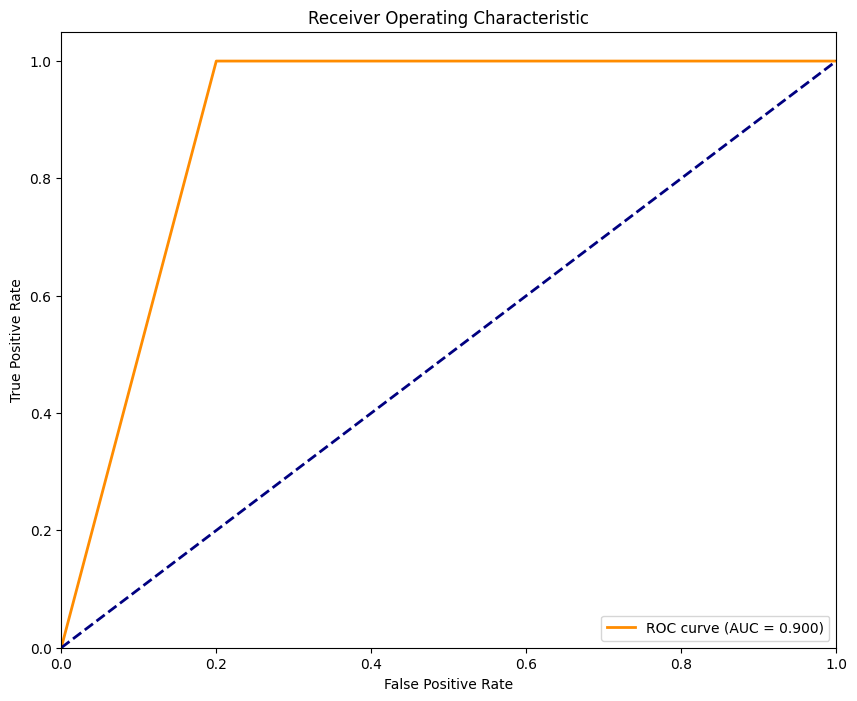

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def metrics(y_test, y_pred, model):
    print("CV1: %0.2f accuracy with a standard deviation of %0.2f" % (cross_val_score(model, X_train, y_train, cv=5).mean(), cross_val_score(model, X_train, y_train, cv=5).std()))
    print("CV2: %0.2f accuracy with a standard deviation of %0.2f" % (cross_val_score(model, X_test, y_test, cv=5).mean(), cross_val_score(model, X_test, y_test, cv=5).std()))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC AUC score: {roc_auc_score(y_test, y_pred):.2f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
    label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('=====================\nRandom Forest Metrics\n=====================')
metrics(y_test, y_pred, model)

Linear Discriminant Analysis
CV1: 0.39 accuracy with a standard deviation of 0.21
CV2: 0.80 accuracy with a standard deviation of 0.24
Accuracy: 0.25
Balanced accuracy: 0.27
Precision: 0.20
Recall: 0.33
F1: 0.25
ROC AUC score: 0.27


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


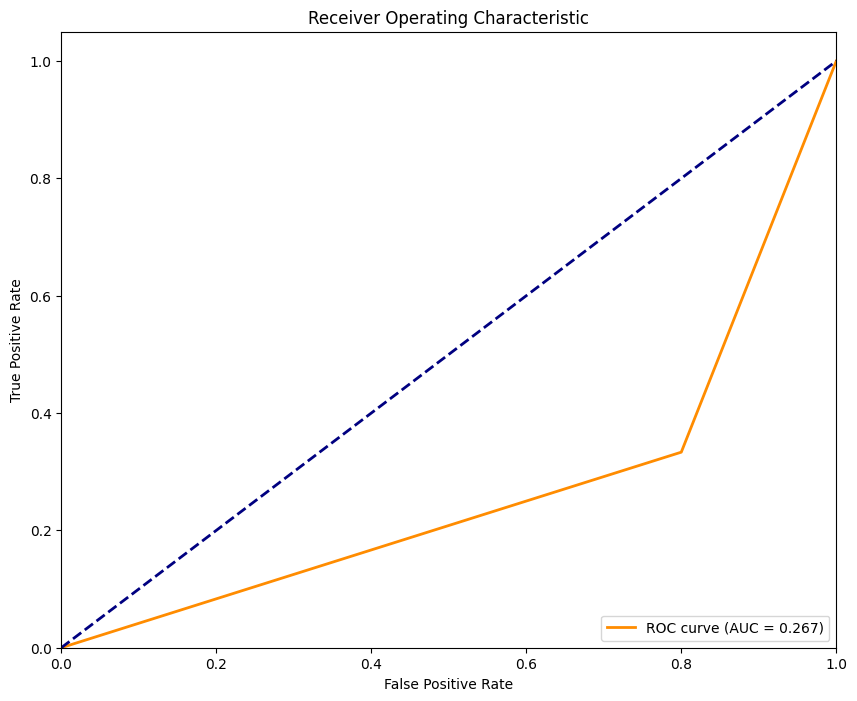

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('============================\nLinear Discriminant Analysis\n============================')
metrics(y_test, y_pred, model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CV1: 0.49 accuracy with a standard deviation of 0.24
CV2: 0.40 accuracy with a standard deviation of 0.37
Accuracy: 0.75
Balanced accuracy: 0.80
Precision: 0.60
Recall: 1.00
F1: 0.75
ROC AUC score: 0.80


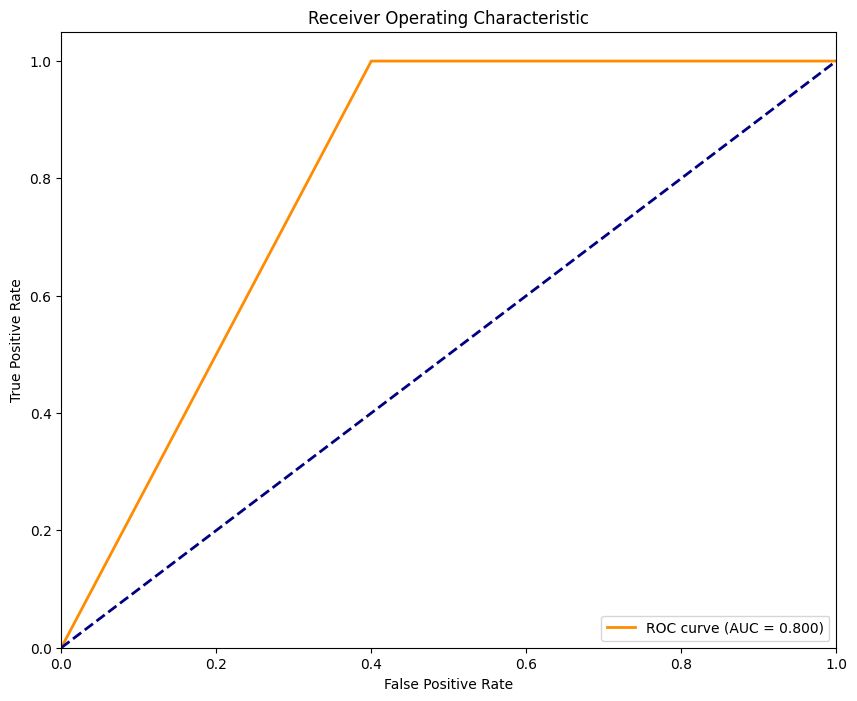

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('===================\nLogistic Regression\n===================')
metrics(y_test, y_pred, model)

XGBClassifier
CV1: 0.59 accuracy with a standard deviation of 0.27


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


CV2: 0.70 accuracy with a standard deviation of 0.24
Accuracy: 0.75
Balanced accuracy: 0.73
Precision: 0.67
Recall: 0.67
F1: 0.67
ROC AUC score: 0.73


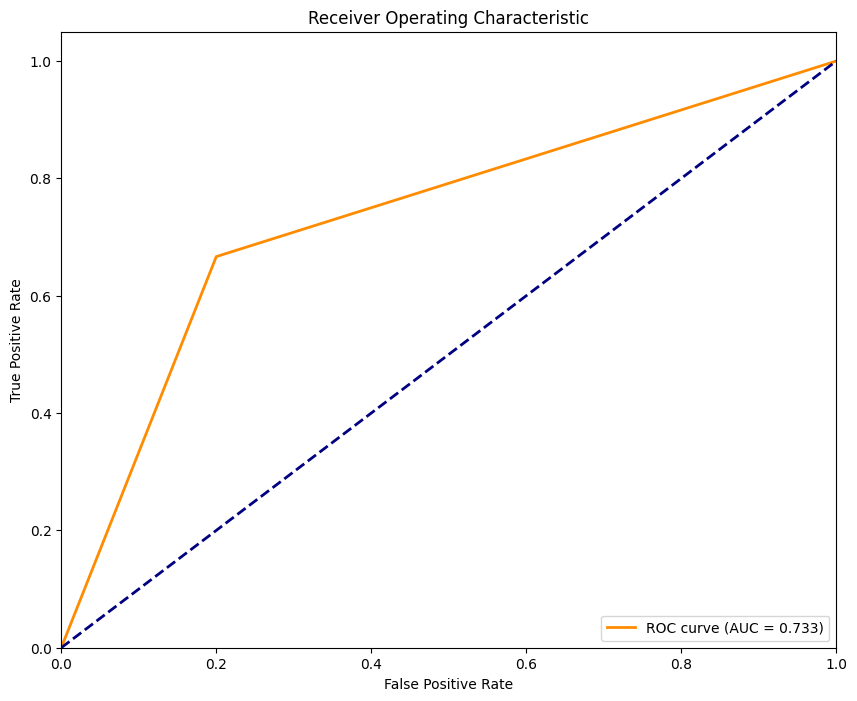

In [12]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('=============\nXGBClassifier\n=============')
metrics(y_test, y_pred, model)

Support Vector Machine
CV1: 0.62 accuracy with a standard deviation of 0.11
CV2: 0.70 accuracy with a standard deviation of 0.24
Accuracy: 0.38
Balanced accuracy: 0.50
Precision: 0.38
Recall: 1.00
F1: 0.55
ROC AUC score: 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


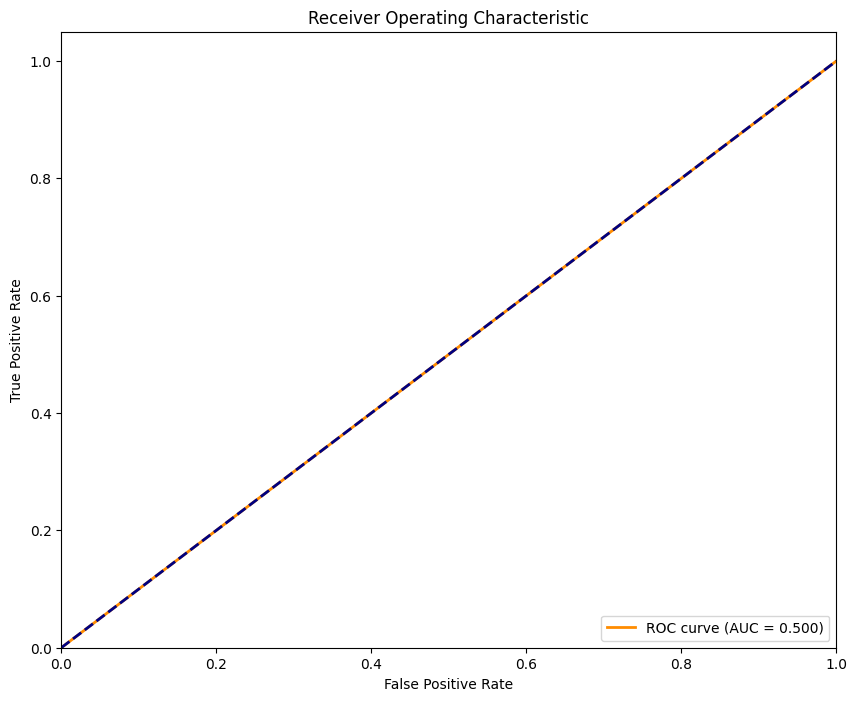

In [13]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('======================\nSupport Vector Machine\n======================')
metrics(y_test, y_pred, model)

In [14]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import glob

df = {}
col_names = []
channels = ['ch', 'lh', 'll', 'rh', 'rl']
for c in channels:
    col_names.append('MEAN_PEAKS_INTERVALS_X_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_Y_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_Z_' + c)
target = [0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
j = 0

for file in sorted(glob.glob('/kaggle/input/parkinson/**/*.csv', recursive=True)):
    if not ('Annot' in str(file) or '007' in str(file) or '014' in str(file) or '060' in str(file) or '062' in str(file) or '063' in str(file)):
        if target[j//5] == 0:
            s = 'Здоровый'
        else:
            s = 'Больной'
        j = j+1
        ID = file.split("ID",1)[1][:3]
        CH = file.split("ID",1)[0][-3:-1]
        data = pd.read_csv(file)
        x_data = data['Accel X (g)']
        y_data = data['Accel Y (g)']
        z_data = data['Accel Z (g)']
        xyz_data = []
        for i in range(len(x_data)):
            elem = (x_data[i]**2 + y_data[i]**2 + z_data[i]**2)**0.5
            xyz_data.append(elem)
        fs = 100
        fft_result = np.fft.fft(xyz_data)
        freq = np.fft.fftfreq(len(xyz_data), 1/fs)
        peaks_X, heights_X = find_peaks(x_data, height = np.sum(x_data)/len(x_data))
        peaks_Y, heights_Y = find_peaks(y_data, height = np.sum(y_data)/len(y_data))
        peaks_Z, heights_Z = find_peaks(z_data, height = np.sum(z_data)/len(z_data))
        peaks_XYZ, heights_XYZ = find_peaks(xyz_data, height = np.sum(xyz_data)/len(xyz_data))
        a = []
        b = []
        c = []
        d = []
        for i in range(len(peaks_X[:50])-1):
            a.append(peaks_X[i+1]-peaks_X[i])
        for i in range(len(peaks_Y[:50])-1):
            b.append(peaks_Y[i+1]-peaks_Y[i])
        for i in range(len(peaks_Z[:50])-1):
            c.append(peaks_Z[i+1]-peaks_Z[i])
        for i in range(len(peaks_XYZ[:50])-1):
            d.append(peaks_XYZ[i+1]-peaks_XYZ[i])
        STD_X = np.std((list(data['Accel X (g)'])))
        STD_Y = np.std((list(data['Accel Y (g)'])))
        STD_Z = np.std((list(data['Accel Z (g)'])))
        STD_XYZ = np.std(xyz_data)
        STD_SPECTRUM = np.std(np.abs(fft_result))
        MEAN_PEAKS_INTERVALS_X = np.sum(a)/len(a)
        MEAN_PEAKS_INTERVALS_Y = np.sum(b)/len(b)
        MEAN_PEAKS_INTERVALS_Z = np.sum(c)/len(c)
        MEAN_PEAKS_INTERVALS_XYZ = np.sum(d)/len(d)
        if df.get(ID, False) is False:
            df[ID] = [MEAN_PEAKS_INTERVALS_X, MEAN_PEAKS_INTERVALS_Y, MEAN_PEAKS_INTERVALS_Z]
        else:
            df[ID].append(MEAN_PEAKS_INTERVALS_X)
            df[ID].append(MEAN_PEAKS_INTERVALS_Y)
            df[ID].append(MEAN_PEAKS_INTERVALS_Z)
df = pd.DataFrame(df).transpose()
df.columns = col_names
df.to_csv('/kaggle/working/dataset2.csv')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=0)

Random Forest Metrics
CV1: 0.67 accuracy with a standard deviation of 0.19


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


CV2: 0.70 accuracy with a standard deviation of 0.24
Accuracy: 0.75
Balanced accuracy: 0.73
Precision: 0.67
Recall: 0.67
F1: 0.67
ROC AUC score: 0.73


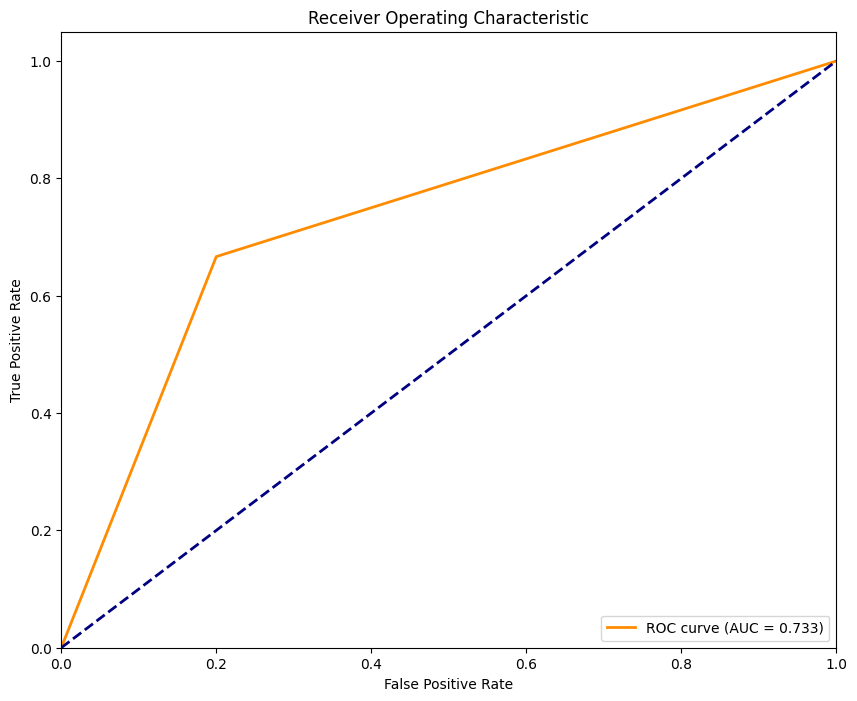

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def metrics(y_test, y_pred, model):
    print("CV1: %0.2f accuracy with a standard deviation of %0.2f" % (cross_val_score(model, X_train, y_train, cv=5).mean(), cross_val_score(model, X_train, y_train, cv=5).std()))
    print("CV2: %0.2f accuracy with a standard deviation of %0.2f" % (cross_val_score(model, X_test, y_test, cv=5).mean(), cross_val_score(model, X_test, y_test, cv=5).std()))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC AUC score: {roc_auc_score(y_test, y_pred):.2f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
    label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('=====================\nRandom Forest Metrics\n=====================')
metrics(y_test, y_pred, model)

Linear Discriminant Analysis
CV1: 0.62 accuracy with a standard deviation of 0.25
CV2: 0.50 accuracy with a standard deviation of 0.32
Accuracy: 0.88
Balanced accuracy: 0.90
Precision: 0.75
Recall: 1.00
F1: 0.86
ROC AUC score: 0.90


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


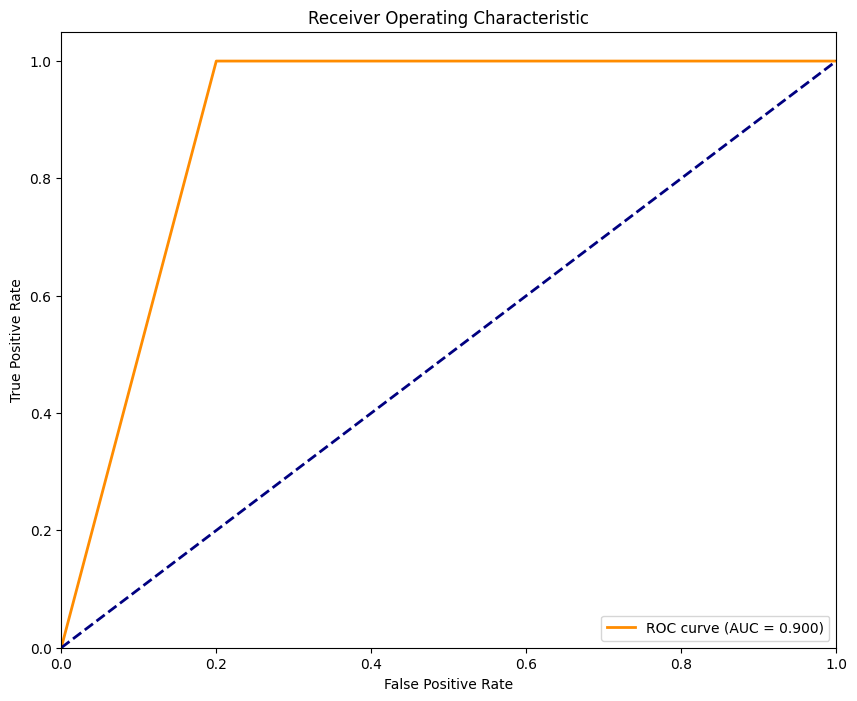

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('============================\nLinear Discriminant Analysis\n============================')
metrics(y_test, y_pred, model)

Logistic Regression
CV1: 0.62 accuracy with a standard deviation of 0.11


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CV2: 0.80 accuracy with a standard deviation of 0.24
Accuracy: 0.50
Balanced accuracy: 0.53
Precision: 0.40
Recall: 0.67
F1: 0.50
ROC AUC score: 0.53


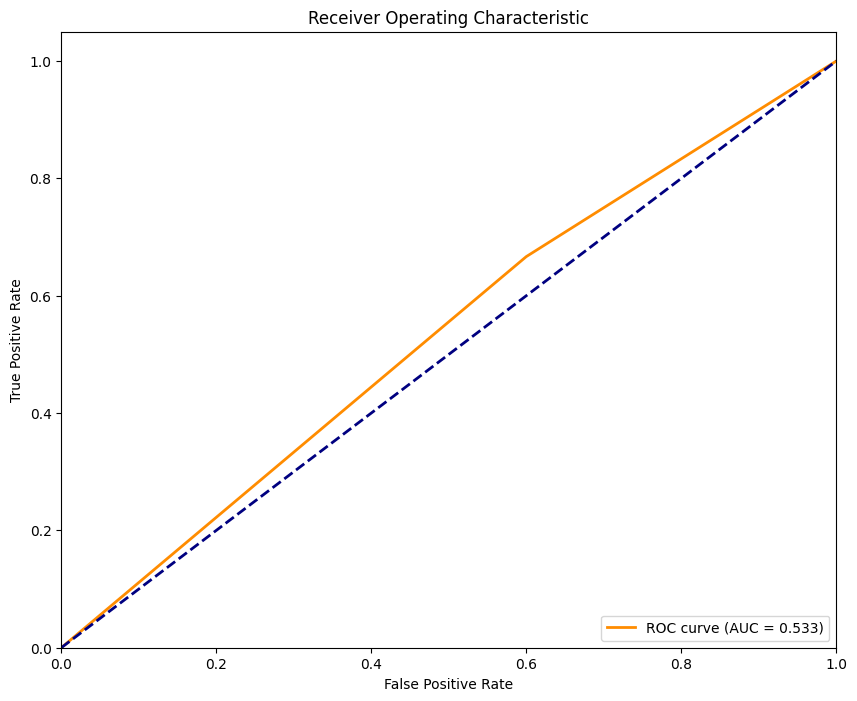

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('===================\nLogistic Regression\n===================')
metrics(y_test, y_pred, model)

XGBClassifier
CV1: 0.52 accuracy with a standard deviation of 0.04


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


CV2: 0.70 accuracy with a standard deviation of 0.24
Accuracy: 0.75
Balanced accuracy: 0.80
Precision: 0.60
Recall: 1.00
F1: 0.75
ROC AUC score: 0.80


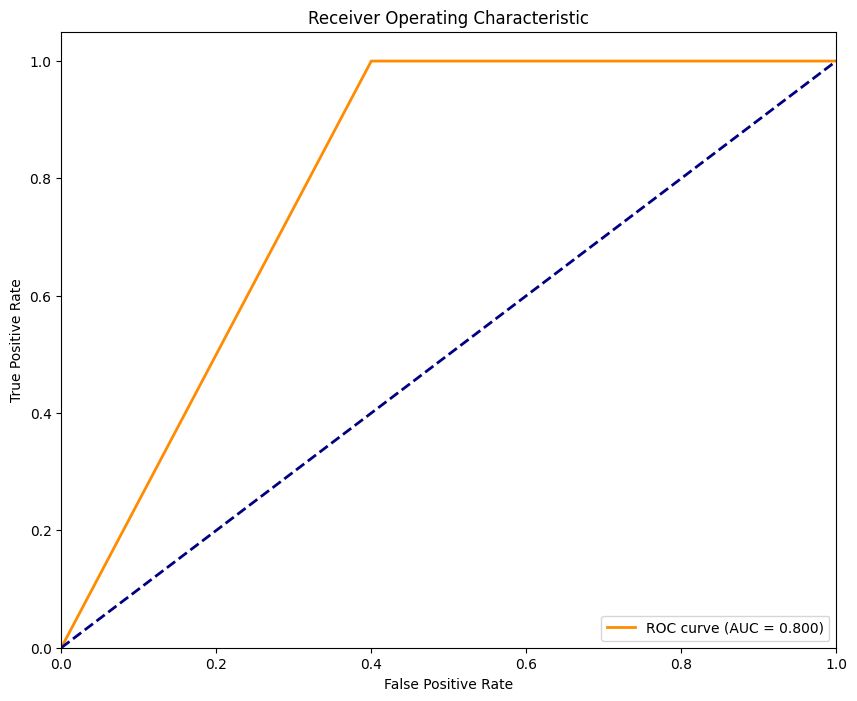

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('=============\nXGBClassifier\n=============')
metrics(y_test, y_pred, model)

Support Vector Machine
CV1: 0.67 accuracy with a standard deviation of 0.19
CV2: 0.70 accuracy with a standard deviation of 0.24
Accuracy: 0.38
Balanced accuracy: 0.37
Precision: 0.25
Recall: 0.33
F1: 0.29
ROC AUC score: 0.37


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


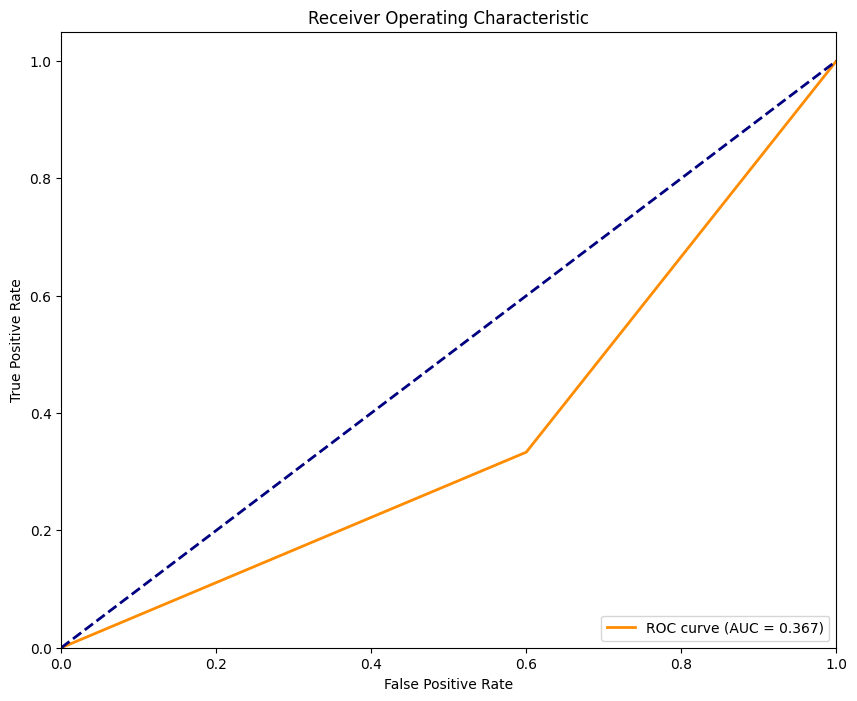

In [20]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('======================\nSupport Vector Machine\n======================')
metrics(y_test, y_pred, model)

# Кроссвалидация без разбиения на тренировочную и тестовую выборки. Метод выделения ВП - 7

In [21]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import glob

df = {}
col_names = []
channels = ['ch', 'lh', 'll', 'rh', 'rl']
for c in channels:
    col_names.append('STD_X_' + c)
    col_names.append('STD_Y_' + c)
    col_names.append('STD_Z_' + c)
    col_names.append('STD_XYZ_' + c)
    col_names.append('STD_SPECTRUM_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_X_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_Y_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_Z_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_XYZ_' + c)
target = [0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
j = 0

for file in sorted(glob.glob('/kaggle/input/parkinson/parkinson/**/*.csv', recursive=True)):
    if not ('Annot' in str(file) or '007' in str(file) or '014' in str(file) or '060' in str(file) or '062' in str(file) or '063' in str(file)):
        if target[j//5] == 0:
            s = 'Здоровый'
        else:
            s = 'Больной'
        j = j+1
        ID = file.split("ID",1)[1][:3]
        CH = file.split("ID",1)[0][-3:-1]
        data = pd.read_csv(file)
        x_data = data['Accel X (g)']
        y_data = data['Accel Y (g)']
        z_data = data['Accel Z (g)']
        xyz_data = []
        for i in range(len(x_data)):
            elem = (x_data[i]**2 + y_data[i]**2 + z_data[i]**2)**0.5
            xyz_data.append(elem)
        fs = 100
        fft_result = np.fft.fft(xyz_data)
        freq = np.fft.fftfreq(len(xyz_data), 1/fs)
        peaks_X, heights_X = find_peaks(x_data, height = np.sum(x_data)/len(x_data))
        peaks_Y, heights_Y = find_peaks(y_data, height = np.sum(y_data)/len(y_data))
        peaks_Z, heights_Z = find_peaks(z_data, height = np.sum(z_data)/len(z_data))
        peaks_XYZ, heights_XYZ = find_peaks(xyz_data, height = np.sum(xyz_data)/len(xyz_data))
        a = []
        b = []
        c = []
        d = []
        for i in range(len(peaks_X[:50])-1):
            a.append(peaks_X[i+1]-peaks_X[i])
        for i in range(len(peaks_Y[:50])-1):
            b.append(peaks_Y[i+1]-peaks_Y[i])
        for i in range(len(peaks_Z[:50])-1):
            c.append(peaks_Z[i+1]-peaks_Z[i])
        for i in range(len(peaks_XYZ[:50])-1):
            d.append(peaks_XYZ[i+1]-peaks_XYZ[i])
        STD_X = np.std((list(data['Accel X (g)'])))
        STD_Y = np.std((list(data['Accel Y (g)'])))
        STD_Z = np.std((list(data['Accel Z (g)'])))
        STD_XYZ = np.std(xyz_data)
        STD_SPECTRUM = np.std(np.abs(fft_result))
        MEAN_PEAKS_INTERVALS_X = np.sum(a)/len(a)
        MEAN_PEAKS_INTERVALS_Y = np.sum(b)/len(b)
        MEAN_PEAKS_INTERVALS_Z = np.sum(c)/len(c)
        MEAN_PEAKS_INTERVALS_XYZ = np.sum(d)/len(d)
        if df.get(ID, False) is False:
            df[ID] = [STD_X, STD_Y, STD_Z, STD_XYZ, STD_SPECTRUM, MEAN_PEAKS_INTERVALS_X, MEAN_PEAKS_INTERVALS_Y, MEAN_PEAKS_INTERVALS_Z, MEAN_PEAKS_INTERVALS_XYZ]
        else:
            df[ID].append(STD_X)
            df[ID].append(STD_Y)
            df[ID].append(STD_Z)
            df[ID].append(STD_XYZ)
            df[ID].append(STD_SPECTRUM)
            df[ID].append(MEAN_PEAKS_INTERVALS_X)
            df[ID].append(MEAN_PEAKS_INTERVALS_Y)
            df[ID].append(MEAN_PEAKS_INTERVALS_Z)
            df[ID].append(MEAN_PEAKS_INTERVALS_XYZ)
df = pd.DataFrame(df).transpose()
df.columns = col_names
df.to_csv('/kaggle/working/dataset2.csv')

df_target = pd.DataFrame(target, columns=['Class'])  

In [22]:
# columns = ['n_folds', 'Accuracy', 'B_accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
# indexes = ['RandomForestClassifier', 'LinearDiscriminantAnalysis', 'LogisticRegression', 'XGBClassifier', 'SVC']
# df_metrics = pd.DataFrame(index = indexes, columns = columns)


In [23]:
from sklearn.model_selection import StratifiedKFold
df_metrics = pd.DataFrame()
def metriks_cross(model, n, df, df_target, name_model, df_metrics):
    skf = StratifiedKFold(n_splits=n)
    i = 1
    Accuracy = []
    B_accuracy = []
    Precision = []
    Recall = []
    F1 = []
    ROC_AUC = []
    for train_index, test_index in skf.split(df, df_target):
        # print('Итерация %d' %i)
        model.fit(df.iloc[train_index], df_target.iloc[train_index])
        y_pred = model.predict(df.iloc[test_index])
        
        Accuracy.append(accuracy_score(df_target.iloc[test_index], y_pred))
        B_accuracy.append(balanced_accuracy_score(df_target.iloc[test_index], y_pred))
        Precision.append(precision_score(df_target.iloc[test_index], y_pred))
        Recall.append(recall_score(df_target.iloc[test_index], y_pred))
        F1.append(f1_score(df_target.iloc[test_index], y_pred))
        ROC_AUC.append(roc_auc_score(df_target.iloc[test_index], y_pred))

        # print('\nМетрики по данному разбиению фолдов')
        # print(f"Accuracy: {accuracy_score(df_target.iloc[test_index], y_pred):.2f}")
        # print(f"Balanced accuracy: {balanced_accuracy_score(df_target.iloc[test_index], y_pred):.2f}")
        # print(f"Precision: {precision_score(df_target.iloc[test_index], y_pred):.2f}")
        # print(f"Recall: {recall_score(df_target.iloc[test_index], y_pred):.2f}")
        # print(f"F1: {f1_score(df_target.iloc[test_index], y_pred):.2f}")
        # print(f"ROC AUC score: {roc_auc_score(df_target.iloc[test_index], y_pred):.2f}")
        # print('\n\n')
        i = i+1
    # print('\nСредние значения метрик:')
    # print(f"Accuracy: {np.sum(Accuracy)/len(Accuracy):.2f}")
    # print(f"Balanced accuracy: {np.sum(B_accuracy)/len(B_accuracy):.2f}")
    # print(f"Precision: {np.sum(Precision)/len(Precision):.2f}")
    # print(f"Recall: {np.sum(Recall)/len(Recall):.2f}")
    # print(f"F1: {np.sum(F1)/len(F1):.2f}")
    # print(f"ROC AUC score: {np.sum(ROC_AUC)/len(ROC_AUC):.2f}")
    
    # df_metrics.at[name_model, 'n_folds'] = n
    # df_metrics.at[name_model, 'Accuracy'] = round(np.sum(Accuracy)/len(Accuracy), 2)
    # df_metrics.at[name_model, 'B_accuracy'] = round(np.sum(B_accuracy)/len(B_accuracy), 2)
    # df_metrics.at[name_model, 'Precision'] = round(np.sum(Precision)/len(Precision), 2)
    # df_metrics.at[name_model, 'Recall'] = round(np.sum(Recall)/len(Recall),2)
    # df_metrics.at[name_model, 'F1'] = round(np.sum(F1)/len(F1), 2)
    # df_metrics.at[name_model, 'ROC_AUC'] = round(np.sum(ROC_AUC)/len(ROC_AUC), 2)


    new_row = pd.DataFrame({"n_folds": n, "Accuracy": round(np.sum(Accuracy)/len(Accuracy), 2), 'B_accuracy': round(np.sum(B_accuracy)/len(B_accuracy), 2), 'Precision': round(np.sum(Precision)/len(Precision), 2), 'Recall': round(np.sum(Recall)/len(Recall),2), 'F1':round(np.sum(F1)/len(F1), 2), 'ROC_AUC':round(np.sum(ROC_AUC)/len(ROC_AUC), 2)}, index = [name_model])  
    # print(new_row)
    df_metrics = pd.concat([df_metrics, new_row]) 
    # print(df_metrics)
    return df_metrics
    print('\n\n')

In [24]:
for n in range(2, 7):
    from sklearn.ensemble import RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # print('=====================\nRandom Forest Metrics\n=====================')
    df_metrics = metriks_cross(rf_classifier, n, df, df_target, 'RandomForestClassifier', df_metrics)
    
    
    
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()  
    # print('============================\nLinear Discriminant Analysis\n============================')
    df_metrics = metriks_cross(lda, n, df, df_target, 'LinearDiscriminantAnalysis', df_metrics)
    
    
    
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    # print('===================\nLogistic Regression\n===================')
    df_metrics = metriks_cross(logr, n, df, df_target, 'LogisticRegression', df_metrics)
    
    
    
    from xgboost import XGBClassifier
    XGBC = XGBClassifier()
    # print('=============\nXGBClassifier\n=============')
    df_metrics = metriks_cross(XGBC, n, df, df_target, 'XGBClassifier', df_metrics)
    
    
    
    from sklearn.svm import SVC
    svc = SVC()
    # print('======================\nSupport Vector Machine\n======================')
    df_metrics = metriks_cross(svc, n, df, df_target, 'SVC', df_metrics)

# print(df_metrics)

/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [25]:
df_metrics

,n_folds,Accuracy,B_accuracy,Precision,Recall,F1,ROC_AUC
RandomForestClassifier,2,0.63,0.63,0.64,0.50,0.51,0.63
LinearDiscriminantAnalysis,2,0.59,0.60,0.66,0.50,0.56,0.60
LogisticRegression,2,0.52,0.52,0.56,0.44,0.48,0.52
XGBClassifier,2,0.62,0.62,0.65,0.69,0.67,0.62
SVC,2,0.49,0.45,0.50,0.69,0.56,0.45
RandomForestClassifier,3,0.73,0.73,0.74,0.76,0.75,0.73
LinearDiscriminantAnalysis,3,0.49,0.50,0.58,0.38,0.45,0.50
LogisticRegression,3,0.39,0.38,0.38,0.46,0.40,0.38
XGBClassifier,3,0.63,0.63,0.68,0.63,0.65,0.63
SVC,3,0.55,0.50,0.55,1.00,0.71,0.50


In [26]:
df_metrics.to_excel('Кросс-валидация_7.xlsx')

In [27]:
# df

In [28]:
# df.transpose()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
print(df.head())
# print(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns, index = df.index)
# print(scaled_df)

     STD_X_ch  STD_Y_ch  STD_Z_ch  STD_XYZ_ch  STD_SPECTRUM_ch  \
005  0.070356  0.099775  0.085363    0.108865        26.472184   
006  0.071955  0.056374  0.059211    0.057362        27.629411   
008  0.130020  0.140173  0.097398    0.149124        17.946218   
010  0.074319  0.148593  0.076074    0.150456        16.710652   
012  0.117423  0.083095  0.083674    0.090960        25.884933   

     MEAN_PEAKS_INTERVALS_X_ch  MEAN_PEAKS_INTERVALS_Y_ch  \
005                   6.571429                   8.183673   
006                   6.244898                   6.408163   
008                   7.525000                   7.285714   
010                   7.250000                   7.333333   
012                   9.877551                   6.510204   

     MEAN_PEAKS_INTERVALS_Z_ch  MEAN_PEAKS_INTERVALS_XYZ_ch  STD_X_lh  ...  \
005                  10.795918                     7.918367  0.123724  ...   
006                   7.428571                     6.122449  0.153973  ...   
00

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df)
# print(pca.feature_names_in_)
# print(pca.components_)
# print('\n')
# print(pca.get_feature_names_out(input_features=pca.feature_names_in_))
# print(df_pca.shape)
# print(df_pca)
print(pca.explained_variance_ratio_)

component_weights = pca.components_
# print(type(df_pca))
df_pca = pd.DataFrame(df_pca)
# print(type(df_pca))

[0.67408193 0.1590595  0.06376923 0.02339454 0.02095756 0.01348426]


In [31]:
feature_weights_mapping = {}
for i, component in enumerate(component_weights):
  component_feature_weights = zip(pca.feature_names_in_, component)
  sorted_feature_weight = sorted(
      component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
  feature_weights_mapping[f"Component {i+1}"] = sorted_feature_weight
  
# Accessing feature names contributing to Principal Component
print("Feature names contributing to Principal Components")
for feature, weight in feature_weights_mapping.items():
  print(f"{feature}: {weight}") 

Feature names contributing to Principal Components
Component 1: [('STD_SPECTRUM_ll', 0.4570607554260684), ('STD_SPECTRUM_lh', 0.4459804106799541), ('STD_SPECTRUM_ch', 0.444056170601274), ('STD_SPECTRUM_rh', 0.43822939065389316), ('STD_SPECTRUM_rl', 0.43253757406044163), ('MEAN_PEAKS_INTERVALS_X_lh', 0.0884740931170482), ('MEAN_PEAKS_INTERVALS_Y_lh', 0.058914008389857615), ('MEAN_PEAKS_INTERVALS_Z_lh', 0.03472043966754579), ('MEAN_PEAKS_INTERVALS_X_rh', -0.029561391845194636), ('MEAN_PEAKS_INTERVALS_Z_ll', 0.02365863311156858), ('MEAN_PEAKS_INTERVALS_Z_ch', 0.01999441295235172), ('MEAN_PEAKS_INTERVALS_Y_rh', -0.017489895728785614), ('MEAN_PEAKS_INTERVALS_X_rl', -0.015178515709308097), ('MEAN_PEAKS_INTERVALS_Y_ll', -0.01502017751981051), ('MEAN_PEAKS_INTERVALS_X_ll', -0.014909979296904003), ('MEAN_PEAKS_INTERVALS_XYZ_lh', 0.011605099546848744), ('MEAN_PEAKS_INTERVALS_XYZ_ch', -0.009692355666756358), ('MEAN_PEAKS_INTERVALS_X_ch', -0.008383733193198345), ('MEAN_PEAKS_INTERVALS_XYZ_ll', -0.

In [32]:
df_metrics = pd.DataFrame()
for n in range(2, 7):
    from sklearn.ensemble import RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # print('=====================\nRandom Forest Metrics\n=====================')
    df_metrics = metriks_cross(rf_classifier, n, df_pca, df_target, 'RandomForestClassifier', df_metrics)
    
    
    
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()  
    # print('============================\nLinear Discriminant Analysis\n============================')
    df_metrics = metriks_cross(lda, n, df_pca, df_target, 'LinearDiscriminantAnalysis', df_metrics)
    
    
    
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    # print('===================\nLogistic Regression\n===================')
    df_metrics = metriks_cross(logr, n, df_pca, df_target, 'LogisticRegression', df_metrics)
    
    
    
    from xgboost import XGBClassifier
    XGBC = XGBClassifier()
    # print('=============\nXGBClassifier\n=============')
    df_metrics = metriks_cross(XGBC, n, df_pca, df_target, 'XGBClassifier', df_metrics)
    
    
    
    from sklearn.svm import SVC
    svc = SVC()
    # print('======================\nSupport Vector Machine\n======================')
    df_metrics = metriks_cross(svc, n, df_pca, df_target, 'SVC', df_metrics)


df_metrics.to_excel('Кросс-валидация_PCA_6.xlsx')

/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [33]:
df_metrics

,n_folds,Accuracy,B_accuracy,Precision,Recall,F1,ROC_AUC
RandomForestClassifier,2,0.51,0.52,0.58,0.44,0.50,0.52
LinearDiscriminantAnalysis,2,0.55,0.54,0.59,0.62,0.60,0.54
LogisticRegression,2,0.48,0.49,0.54,0.38,0.43,0.49
XGBClassifier,2,0.62,0.62,0.67,0.62,0.65,0.62
SVC,2,0.55,0.53,0.62,0.62,0.55,0.53
RandomForestClassifier,3,0.46,0.46,0.50,0.52,0.49,0.46
LinearDiscriminantAnalysis,3,0.45,0.43,0.50,0.50,0.50,0.43
LogisticRegression,3,0.49,0.47,0.52,0.57,0.54,0.47
XGBClassifier,3,0.56,0.54,0.57,0.70,0.63,0.54
SVC,3,0.49,0.47,0.50,0.57,0.50,0.47


In [34]:
pca = PCA(n_components = 15)
df_pca = pca.fit_transform(df)
# print(pca.feature_names_in_)
# print(pca.components_)
# print('\n')
# print(pca.get_feature_names_out(input_features=pca.feature_names_in_))
# print(df_pca.shape)
# print(df_pca)
print(pca.explained_variance_ratio_)

component_weights = pca.components_
# print(type(df_pca))
df_pca = pd.DataFrame(df_pca)
# print(type(df_pca))

[0.67408193 0.1590595  0.06376923 0.02339454 0.02095756 0.01348426
 0.01185028 0.00756852 0.00636709 0.00412186 0.00397417 0.00285428
 0.00186347 0.00160723 0.00147453]


In [35]:
df_metrics = pd.DataFrame()
for n in range(2, 7):
    from sklearn.ensemble import RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # print('=====================\nRandom Forest Metrics\n=====================')
    df_metrics = metriks_cross(rf_classifier, n, df_pca, df_target, 'RandomForestClassifier', df_metrics)
    
    
    
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()  
    # print('============================\nLinear Discriminant Analysis\n============================')
    df_metrics = metriks_cross(lda, n, df_pca, df_target, 'LinearDiscriminantAnalysis', df_metrics)
    
    
    
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    # print('===================\nLogistic Regression\n===================')
    df_metrics = metriks_cross(logr, n, df_pca, df_target, 'LogisticRegression', df_metrics)
    
    
    
    from xgboost import XGBClassifier
    XGBC = XGBClassifier()
    # print('=============\nXGBClassifier\n=============')
    df_metrics = metriks_cross(XGBC, n, df_pca, df_target, 'XGBClassifier', df_metrics)
    
    
    
    from sklearn.svm import SVC
    svc = SVC()
    # print('======================\nSupport Vector Machine\n======================')
    df_metrics = metriks_cross(svc, n, df_pca, df_target, 'SVC', df_metrics)


df_metrics.to_excel('Кросс-валидация_PCA_15.xlsx')

/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [36]:
pca = PCA(n_components = 25)
df_pca = pca.fit_transform(df)
# print(pca.feature_names_in_)
# print(pca.components_)
# print('\n')
# print(pca.get_feature_names_out(input_features=pca.feature_names_in_))
# print(df_pca.shape)
# print(df_pca)
print(pca.explained_variance_ratio_)

component_weights = pca.components_
# print(type(df_pca))
df_pca = pd.DataFrame(df_pca)
# print(type(df_pca))

[6.74081927e-01 1.59059502e-01 6.37692346e-02 2.33945416e-02
 2.09575553e-02 1.34842553e-02 1.18502807e-02 7.56852380e-03
 6.36708688e-03 4.12186408e-03 3.97417173e-03 2.85428443e-03
 1.86346838e-03 1.60722602e-03 1.47452956e-03 9.60756257e-04
 7.10131621e-04 6.16943277e-04 3.98944732e-04 3.44779257e-04
 2.27366651e-04 1.53740514e-04 8.76916014e-05 3.06131556e-05
 2.16185728e-05]


In [37]:
df_metrics = pd.DataFrame()
for n in range(2, 7):
    from sklearn.ensemble import RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # print('=====================\nRandom Forest Metrics\n=====================')
    df_metrics = metriks_cross(rf_classifier, n, df_pca, df_target, 'RandomForestClassifier', df_metrics)
    
    
    
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()  
    # print('============================\nLinear Discriminant Analysis\n============================')
    df_metrics = metriks_cross(lda, n, df_pca, df_target, 'LinearDiscriminantAnalysis', df_metrics)
    
    
    
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    # print('===================\nLogistic Regression\n===================')
    df_metrics = metriks_cross(logr, n, df_pca, df_target, 'LogisticRegression', df_metrics)
    
    
    
    from xgboost import XGBClassifier
    XGBC = XGBClassifier()
    # print('=============\nXGBClassifier\n=============')
    df_metrics = metriks_cross(XGBC, n, df_pca, df_target, 'XGBClassifier', df_metrics)
    
    
    
    from sklearn.svm import SVC
    svc = SVC()
    # print('======================\nSupport Vector Machine\n======================')
    df_metrics = metriks_cross(svc, n, df_pca, df_target, 'SVC', df_metrics)


df_metrics.to_excel('Кросс-валидация_PCA_25.xlsx')

/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [39]:
pca = PCA(n_components = 29)
df_pca = pca.fit_transform(df)
# print(pca.feature_names_in_)
# print(pca.components_)
# print('\n')
# print(pca.get_feature_names_out(input_features=pca.feature_names_in_))
# print(df_pca.shape)
# print(df_pca)
print(pca.explained_variance_ratio_)

component_weights = pca.components_
# print(type(df_pca))
df_pca = pd.DataFrame(df_pca)
# print(type(df_pca))

[6.74081927e-01 1.59059502e-01 6.37692346e-02 2.33945416e-02
 2.09575553e-02 1.34842553e-02 1.18502807e-02 7.56852380e-03
 6.36708688e-03 4.12186408e-03 3.97417173e-03 2.85428443e-03
 1.86346838e-03 1.60722602e-03 1.47452956e-03 9.60756257e-04
 7.10131621e-04 6.16943277e-04 3.98944732e-04 3.44779257e-04
 2.27366651e-04 1.53740514e-04 8.76916014e-05 3.06131556e-05
 2.16185728e-05 1.16143547e-05 6.08725486e-06 1.26191502e-06
 2.87463025e-32]


In [41]:
df_metrics = pd.DataFrame()
for n in range(2, 7):
    from sklearn.ensemble import RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # print('=====================\nRandom Forest Metrics\n=====================')
    df_metrics = metriks_cross(rf_classifier, n, df_pca, df_target, 'RandomForestClassifier', df_metrics)
    
    
    
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()  
    # print('============================\nLinear Discriminant Analysis\n============================')
    df_metrics = metriks_cross(lda, n, df_pca, df_target, 'LinearDiscriminantAnalysis', df_metrics)
    
    
    
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    # print('===================\nLogistic Regression\n===================')
    df_metrics = metriks_cross(logr, n, df_pca, df_target, 'LogisticRegression', df_metrics)
    
    
    
    from xgboost import XGBClassifier
    XGBC = XGBClassifier()
    # print('=============\nXGBClassifier\n=============')
    df_metrics = metriks_cross(XGBC, n, df_pca, df_target, 'XGBClassifier', df_metrics)
    
    
    
    from sklearn.svm import SVC
    svc = SVC()
    # print('======================\nSupport Vector Machine\n======================')
    df_metrics = metriks_cross(svc, n, df_pca, df_target, 'SVC', df_metrics)


df_metrics.to_excel('Кросс-валидация_PCA_29.xlsx')

/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

# Кроссвалидация без разбиения на тренировочную и тестовую выборки. Метод выделения ВП - 5

In [42]:
df = {}
col_names = []
channels = ['ch', 'lh', 'll', 'rh', 'rl']
for c in channels:
    col_names.append('STD_X_' + c)
    col_names.append('STD_Y_' + c)
    col_names.append('STD_Z_' + c)
    #col_names.append('STD_XYZ_' + c)
    col_names.append('STD_SPECTRUM_' + c)
    col_names.append('MEAN_PEAKS_INTERVALS_XYZ_' + c)
target = [0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
j = 0

for file in sorted(glob.glob('/kaggle/input/parkinson/parkinson/**/*.csv', recursive=True)):
    if not ('Annot' in str(file) or '007' in str(file) or '014' in str(file) or '060' in str(file) or '062' in str(file) or '063' in str(file)):
        if target[j//5] == 0:
            s = 'Здоровый'
        else:
            s = 'Больной'
        j = j+1
        ID = file.split("ID",1)[1][:3]
        CH = file.split("ID",1)[0][-3:-1]
        data = pd.read_csv(file)
        x_data = data['Accel X (g)']
        y_data = data['Accel Y (g)']
        z_data = data['Accel Z (g)']
        xyz_data = []
        for i in range(len(x_data)):
            elem = (x_data[i]**2 + y_data[i]**2 + z_data[i]**2)**0.5
            xyz_data.append(elem)
        fs = 100
        fft_result = np.fft.fft(xyz_data)
        freq = np.fft.fftfreq(len(xyz_data), 1/fs)
        peaks_XYZ, heights_XYZ = find_peaks(xyz_data, height = np.sum(xyz_data)/len(xyz_data))
        b = []
        for i in range(len(peaks_XYZ)-1):
            b.append(peaks_XYZ[i+1]-peaks_XYZ[i])
        STD_X = np.std((list(data['Accel X (g)'])))
        STD_Y = np.std((list(data['Accel Y (g)'])))
        STD_Z = np.std((list(data['Accel Z (g)'])))
        STD_XYZ = np.std(xyz_data)
        STD_SPECTRUM = np.std(np.abs(fft_result))
        MEAN_PEAKS_INTERVALS_XYZ = np.sum(b)/len(b)
        if df.get(ID, False) is False:
            df[ID] = [STD_X, STD_Y, STD_Z, STD_SPECTRUM, MEAN_PEAKS_INTERVALS_XYZ]
        else:
            df[ID].append(STD_X)
            df[ID].append(STD_Y)
            df[ID].append(STD_Z)
            #df[ID].append(STD_XYZ)
            df[ID].append(STD_SPECTRUM)
            df[ID].append(MEAN_PEAKS_INTERVALS_XYZ)
df = pd.DataFrame(df).transpose()
df.columns = col_names
# df.to_csv('/kaggle/working/dataset2.csv')
df_target = pd.DataFrame(target, columns=['Class']) 

In [43]:
df_metrics = pd.DataFrame()
for n in range(2, 7):
    from sklearn.ensemble import RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # print('=====================\nRandom Forest Metrics\n=====================')
    df_metrics = metriks_cross(rf_classifier, n, df, df_target, 'RandomForestClassifier', df_metrics)
    
    
    
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()  
    # print('============================\nLinear Discriminant Analysis\n============================')
    df_metrics = metriks_cross(lda, n, df, df_target, 'LinearDiscriminantAnalysis', df_metrics)
    
    
    
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    # print('===================\nLogistic Regression\n===================')
    df_metrics = metriks_cross(logr, n, df, df_target, 'LogisticRegression', df_metrics)
    
    
    
    from xgboost import XGBClassifier
    XGBC = XGBClassifier()
    # print('=============\nXGBClassifier\n=============')
    df_metrics = metriks_cross(XGBC, n, df, df_target, 'XGBClassifier', df_metrics)
    
    
    
    from sklearn.svm import SVC
    svc = SVC()
    # print('======================\nSupport Vector Machine\n======================')
    df_metrics = metriks_cross(svc, n, df, df_target, 'SVC', df_metrics)

# print(df_metrics)
df_metrics.to_excel('Кросс-валидация_5.xlsx')

/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/tmp/ipykernel_154/1744631648.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df.iloc[train_index], df_target.iloc[train_index])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(